<h1>Import packages & prepare data</h1>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import matplotlib as plt
import comparing as comp
import combining as comb
import plots
import numpy as np
from scipy.stats import entropy

In [2]:
plt.rcParams.update({'font.size': 30})

In [3]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

In [4]:
nc_l70 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l70-u.nc")

In [5]:
nc_l3 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l3-u.nc")

In [6]:
nc_l300 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l300-u.nc")

In [7]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [8]:
u_l70 = nc_l70.variables["u"]
u_l70 = calc.deseasonalize_map(u_l70)

In [9]:
u_l3 = nc_l3.variables["u"]
u_l3 = calc.deseasonalize_map(u_l3)

In [10]:
u_l300 = nc_l300.variables["u"]
u_l300 = calc.deseasonalize_map(u_l300)

<h1>Present similarity measures</h1>

In [11]:
measures = [sim.pearson_correlation, sim.mutual_information, sim.manhattan_distance, sim.transfer_entropy]

In [12]:
measure_labels=["Pearson's Correlation", "Mutual Information", "Manhattan Distance", "Transfer Entropy"]

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:753: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


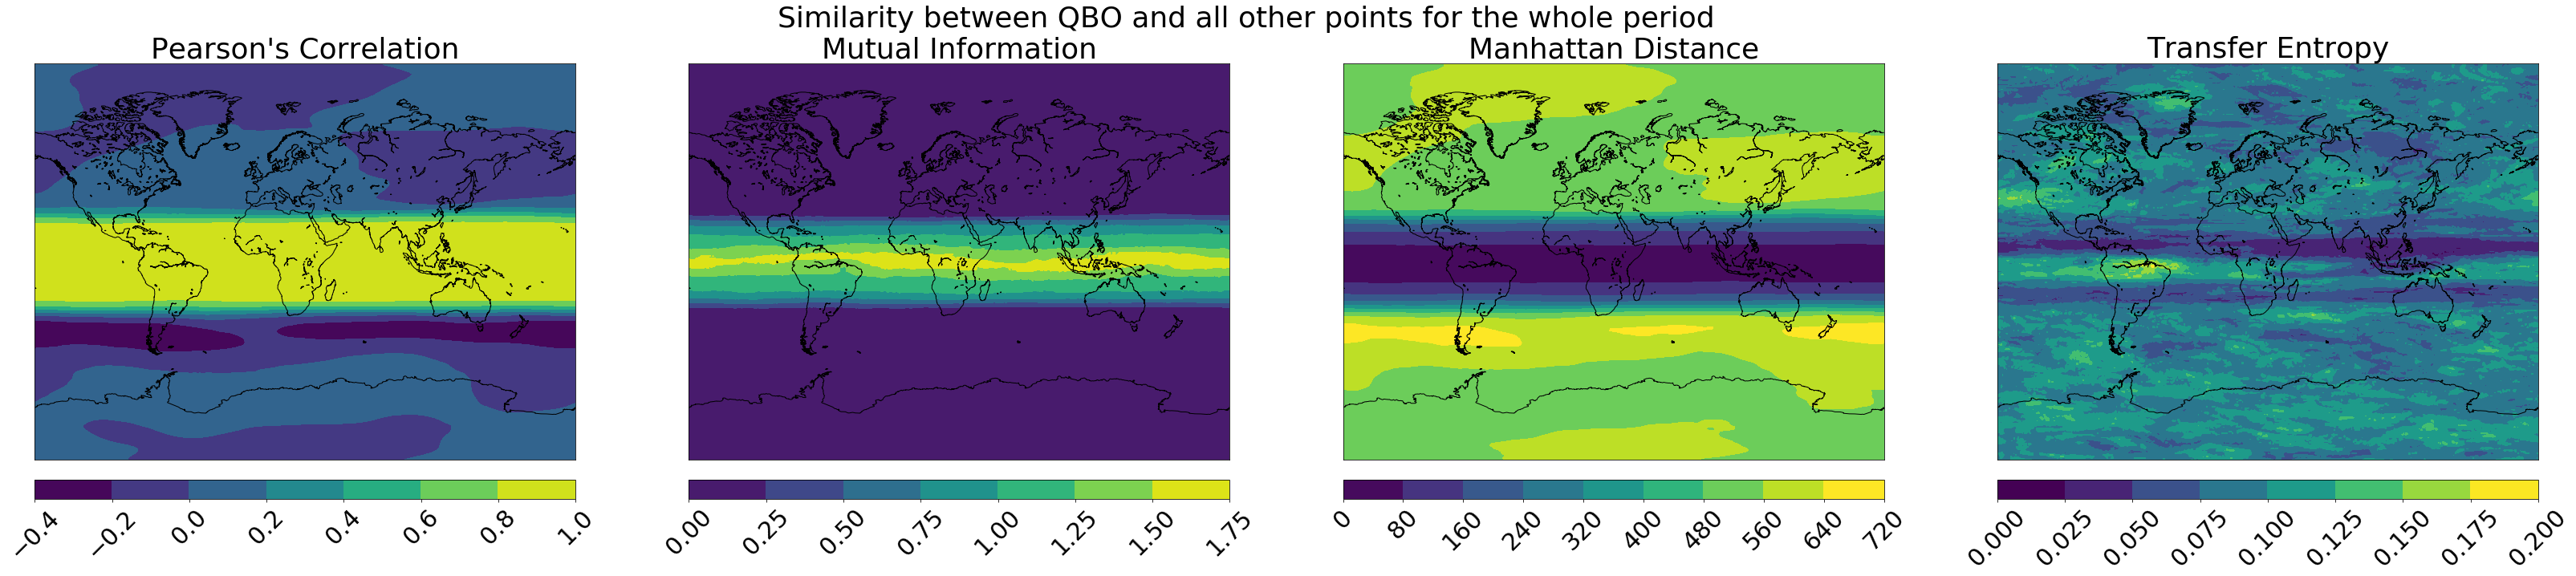

In [13]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.identity)

<h1>Comparing</h1>

In [14]:
measures = [sim.pearson_correlation_abs, sim.mutual_information, comp.invert(sim.manhattan_distance), comp.invert(sim.transfer_entropy)]

In [15]:
measure_labels=["Absolute Pearson's Correlation", "Mutual Information", "Inverted Manhattan Distance", "Inverted Transfer Entropy"]

<h3>Min-Max-Normalization</h3>

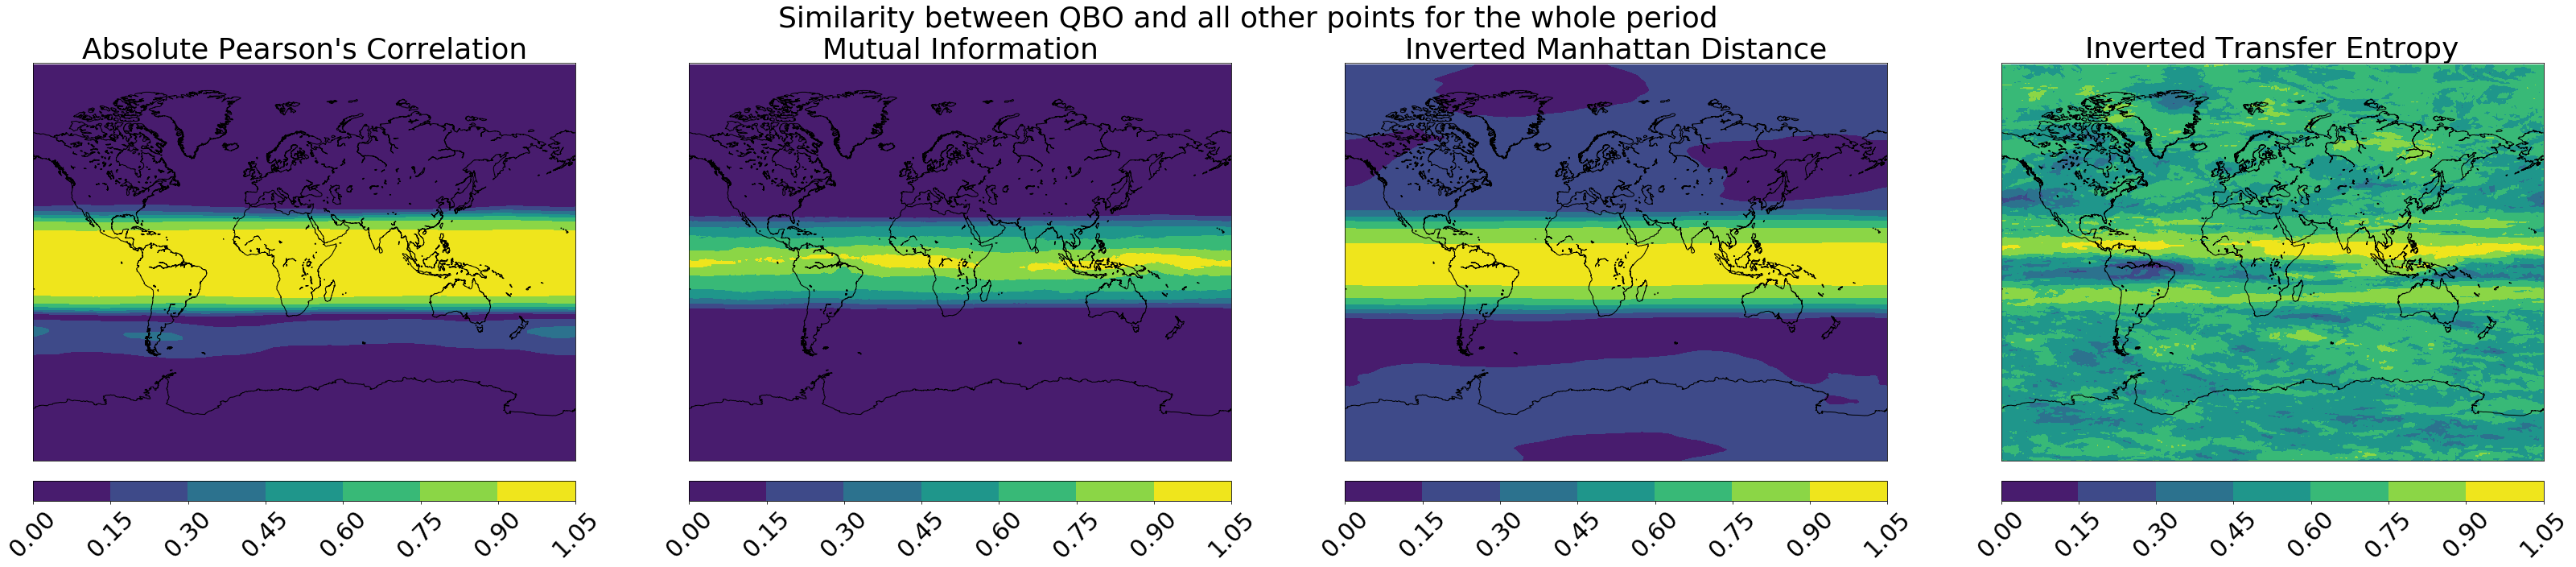

In [16]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.min_max_normalization)

<h3>Binning to 10 quantiles</h3>

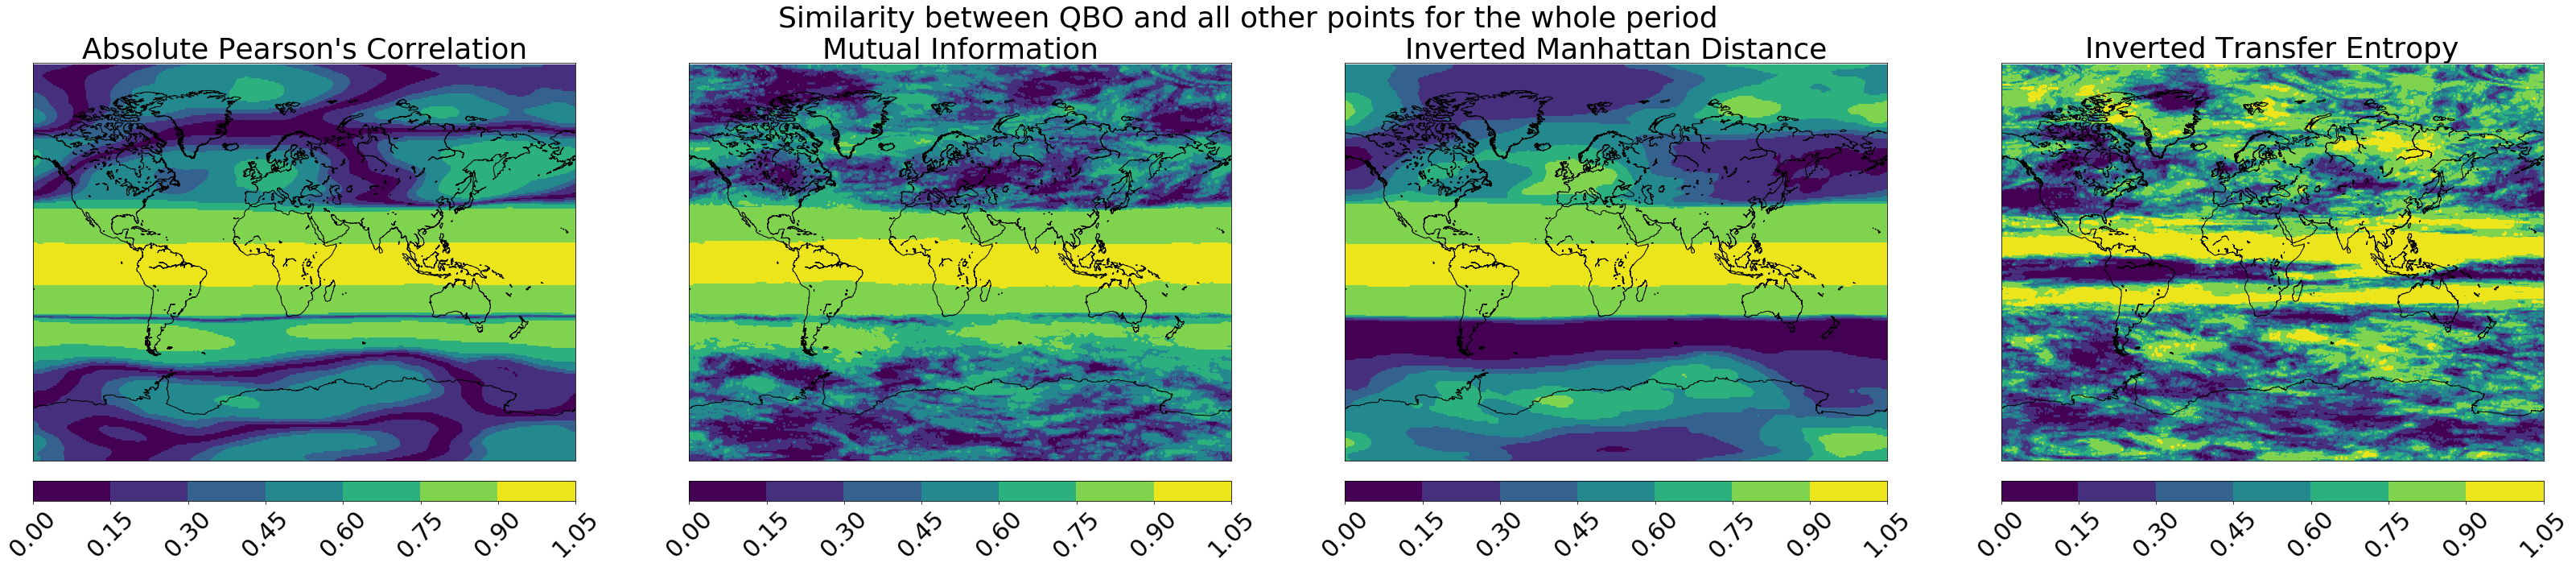

In [17]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.binning_values_to_quantiles)

<h3>Binning to 100 quantiles</h3>

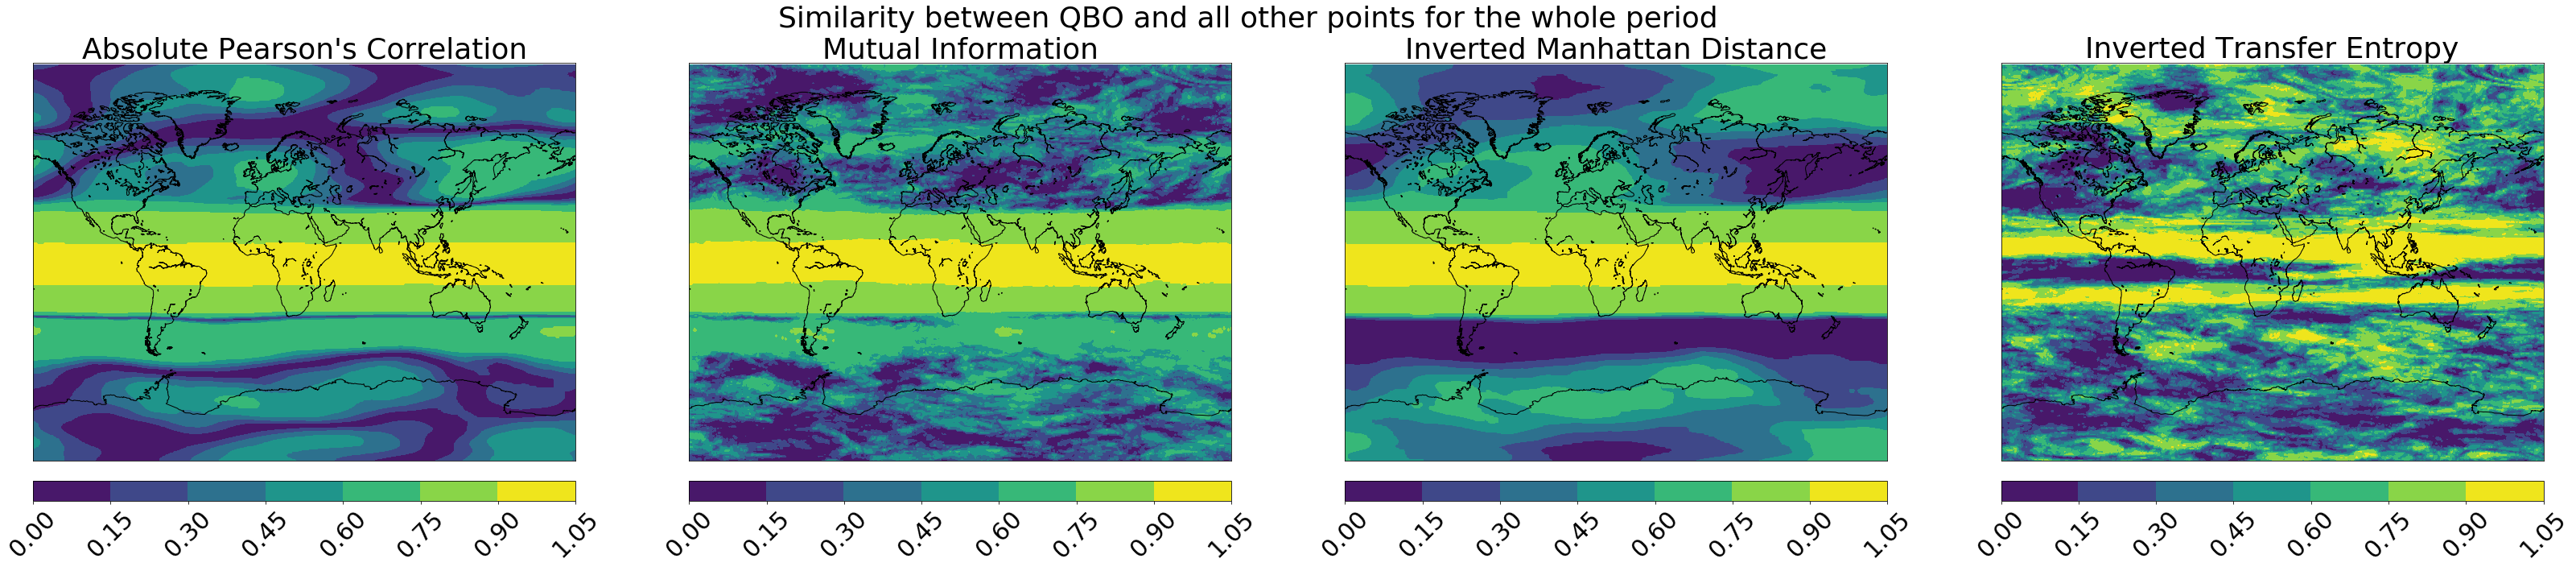

In [18]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.binning_to_100_bins)

<h3>Binning to 1000 quantiles</h3>

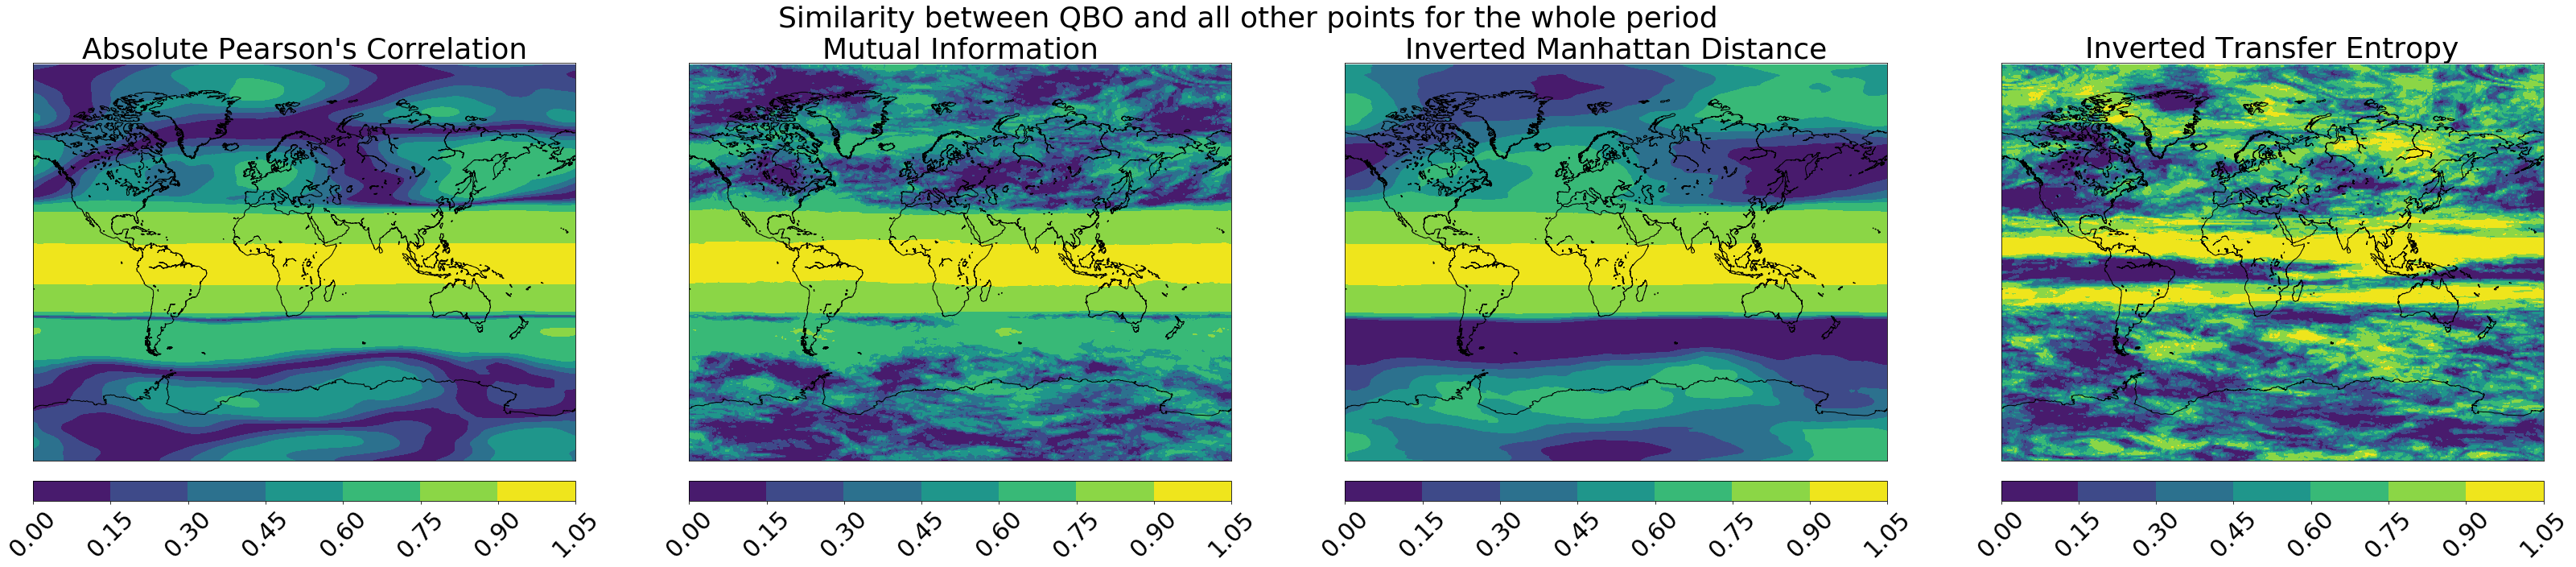

In [19]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.binning_to_1000_bins)

<h3>Histogram Equalization</h3>

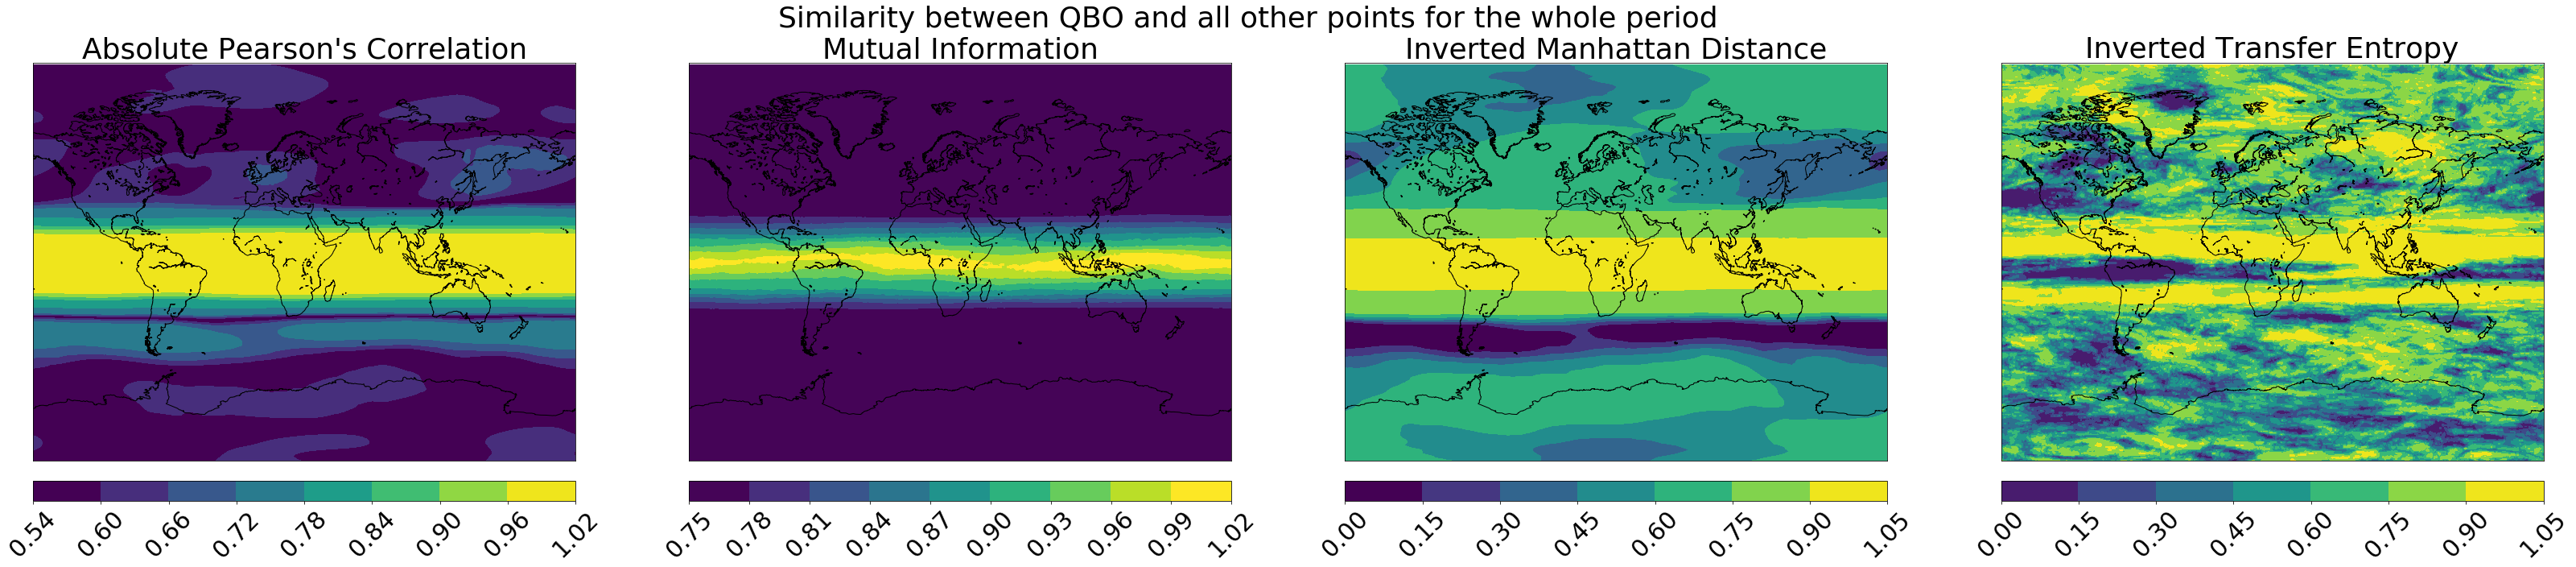

In [20]:
plots.plot_similarities(u_l30, qbo_equator, measures, measure_labels, scaling_func=comp.equalize_histogram)